In [2]:
#Description" This program calculates the Sharpe Ratio, Win Rate, Total Profit, Cumulative Realized Profit and Profit Distribution

In [3]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Get the data

copytrader_1_positions = pd.read_csv('copytrader_data/positions_3838699803249970688.csv')
copytrader_2_positions = pd.read_csv('copytrader_data/positions_3871399360910422273.csv')

copytrader_1_positions['time'] = pd.to_datetime(copytrader_1_positions['opened'], unit = 'ms')
copytrader_1_positions = copytrader_1_positions.sort_values('time').reset_index(drop=True)

copytrader_2_positions['time'] = pd.to_datetime(copytrader_2_positions['opened'], unit = 'ms')
copytrader_2_positions = copytrader_2_positions.sort_values('time').reset_index(drop=True)

#Show the data of Copytrader 1
copytrader_1_positions.head()

,Unnamed: 0,id,symbol,type,opened,closed,avgCost,avgClosePrice,closingPnl,maxOpenInterest,closedVolume,isolated,side,status,updateTime,time
0,1899,1155605,DOGEUSDT,UM,1701946005725,1701947621356,0.094014,0.09442,0.609,1500.0,1500.0,Cross,Long,All Closed,1701947621531,2023-12-07 10:46:45.725
1,1898,1159663,DOGEUSDT,UM,1701948778280,1701952291740,0.094376,0.09482,0.488,1100.0,1100.0,Cross,Long,All Closed,1701952291846,2023-12-07 11:32:58.280
2,1897,1164109,DOGEUSDT,UM,1701956987503,1701958279285,0.094260,0.09462,0.180,500.0,500.0,Cross,Long,All Closed,1701958279433,2023-12-07 13:49:47.503
3,1896,1164561,DOGEUSDT,UM,1701958880205,1701959196467,0.094310,0.09472,0.205,500.0,500.0,Cross,Long,All Closed,1701959196617,2023-12-07 14:21:20.205
4,1895,1171655,DOGEUSDT,UM,1701962781183,1701964883559,0.096497,0.09608,0.501,1200.0,1200.0,Cross,Short,All Closed,1701964884135,2023-12-07 15:26:21.183


In [5]:
#Show the data of Copytrader 2
copytrader_2_positions.head()

,Unnamed: 0,id,symbol,type,opened,closed,avgCost,avgClosePrice,closingPnl,maxOpenInterest,closedVolume,isolated,side,status,updateTime,time
0,2449,5778622,1000SHIBUSDT,UM,1704736631230,1704736875036,0.009276,0.009345,0.120612,1748.0,1748.0,Cross,Long,All Closed,1704736875185,2024-01-08 17:57:11.230
1,2448,5780298,1000SHIBUSDT,UM,1704736938814,1704738205200,0.009318,0.009388,0.121870,1741.0,1741.0,Cross,Long,All Closed,1704738205375,2024-01-08 18:02:18.814
2,2447,5784298,1000SHIBUSDT,UM,1704738258278,1704739126736,0.009408,0.009478,0.120680,1724.0,1724.0,Cross,Long,All Closed,1704739126887,2024-01-08 18:24:18.278
3,2446,5788014,1000SHIBUSDT,UM,1704739151663,1704742444275,0.009468,0.009539,0.121623,1713.0,1713.0,Cross,Long,All Closed,1704742444480,2024-01-08 18:39:11.663
4,2445,5797669,1000SHIBUSDT,UM,1704742518313,1704775536851,0.009425,0.009496,0.405878,5723.0,5723.0,Cross,Long,All Closed,1704810041198,2024-01-08 19:35:18.313


In [6]:
#Calculate the daily returns
copytrader_1_positions['returns'] = copytrader_1_positions['avgClosePrice'].pct_change()
copytrader_2_positions['returns'] = copytrader_2_positions['avgClosePrice'].pct_change()

In [7]:
#Define the risk-free rate
risk_free_rate = 0.03/365

In [8]:
#Calculate the excess returns
copytrader_1_positions['excess_returns'] = copytrader_1_positions['returns'] - risk_free_rate
copytrader_2_positions['excess_returns'] = copytrader_2_positions['returns'] - risk_free_rate

In [9]:
#Calculate the Sharpe Ratio
sharpe_ratio_1 = np.sqrt(365) * copytrader_1_positions['excess_returns'].mean() / copytrader_1_positions['excess_returns'].std()
sharpe_ratio_2 = np.sqrt(365) * copytrader_2_positions['excess_returns'].mean() / copytrader_2_positions['excess_returns'].std()

#sharpe_ratio_1 = np.sqrt(365) * (copytrader_1_positions['returns'].mean() - risk_free_rate) / copytrader_1_positions['returns'].std()
#sharpe_ratio_2 = np.sqrt(365) * (copytrader_2_positions['returns'].mean() - risk_free_rate) / copytrader_2_positions['returns'].std()

In [10]:
#Print the Sharpe Ratio
print('Sharpe Ratio of Copytrader 1:', sharpe_ratio_1)
print('Sharpe Ratio of Copytrader 2:', sharpe_ratio_2)

Sharpe Ratio of Copytrader 1: 0.9425939180520674
Sharpe Ratio of Copytrader 2: 1.588937654148646


In [11]:
#Sharpe Ratio below 1 is considered bad.
#Sharpe Ratio of 1 is considered acceptable to good.
#Sharpe Ratio of 2 is rated as very good.
#Sharpe Ratio of 3 or higher is considered excellent.

#Conclusion: Porfolio of Copytrader 2 is going to be the one that give the biggest expected reward per unit of risk or volatility.

In [12]:
#Calculate the Win Rate
#Formula: win_rate = profit_trades / total_trades

profit_trades_1 = (copytrader_1_positions['closingPnl'] > 0).sum()
profit_trades_2 = (copytrader_2_positions['closingPnl'] > 0).sum()

total_trades_1 = len(copytrader_1_positions)
total_trades_2 = len(copytrader_2_positions)

win_rate_1 = (profit_trades_1 / total_trades_1) * 100
win_rate_2 = (profit_trades_2 / total_trades_2) * 100

print(f'Win Rate of Copytrader 1: {win_rate_1:.2f}%')
print(f'Win Rate of Copytrader 2: {win_rate_2:.2f}%')

Win Rate of Copytrader 1: 99.84%
Win Rate of Copytrader 2: 98.82%


In [13]:
# Calculate the Total Profit
# Initialize total balance
total_balance_on_account = 4000

# Calculate income in percentage
incomes_1 = copytrader_1_positions['closingPnl'] / total_balance_on_account * 100
incomes_2 = copytrader_2_positions['closingPnl'] / total_balance_on_account * 100

# Загальний прибуток у відсотках
total_profit_percent_1 = incomes_1.sum()
total_profit_percent_2 = incomes_2.sum()

print(f'Total Profit of Copytrader 1: {round(total_profit_percent_1, 3)}%')
print(f'Total Profit of Copytrader 2: {round(total_profit_percent_2, 3)}%')

Total Profit of Copytrader 1: 23.296%
Total Profit of Copytrader 2: 17.703%


In [14]:
#In summary, Copytrader 1 might be suited for investors looking for higher absolute returns and willing to take on more risk, while Copytrader 2 might appeal to those who prioritize risk-adjusted returns and prefer a more balanced approach.
#Copytrader 1 shows higher total profit and win rate, but the Sharpe ratio indicates that these returns come with relatively higher risk. The strategy might be more aggressive or less efficient in terms of risk management.
#Copytrader 2 has a higher Sharpe ratio, indicating better risk-adjusted performance. Even though the total profit is slightly lower, the strategy is more efficient in managing risk, which could be preferable for risk-averse investors.

In [15]:
# Calculate income in percentage
copytrader_1_positions['income_pct'] = incomes_1
copytrader_2_positions['income_pct'] = incomes_2

# Include trading fees in the income calculation
def apply_trading_fees(row):
    # Assume market orders if 'orderType' column is missing
    fee = 0.022 if row.get('orderType', 'market') == 'market' else 0.004
    row['net_income_pct'] = row['income_pct'] - fee
    return row

copytrader_1_positions = copytrader_1_positions.apply(apply_trading_fees, axis=1)
copytrader_2_positions = copytrader_2_positions.apply(apply_trading_fees, axis=1)

In [16]:
# Calculate cumulative realized profit
copytrader_1_positions['cumulative_profit_pct'] = copytrader_1_positions['net_income_pct'].cumsum()
copytrader_2_positions['cumulative_profit_pct'] = copytrader_2_positions['net_income_pct'].cumsum()

In [17]:
# Calculate profit distribution statistics
profit_stats_1 = {
    'mean': copytrader_1_positions['net_income_pct'].mean(),
    'min': copytrader_1_positions['net_income_pct'].min(),
    'max': copytrader_1_positions['net_income_pct'].max(),
    'count': copytrader_1_positions['net_income_pct'].count(),
    'quartiles': copytrader_1_positions['net_income_pct'].quantile([0.25, 0.5, 0.75])
}

profit_stats_2 = {
    'mean': copytrader_2_positions['net_income_pct'].mean(),
    'min': copytrader_2_positions['net_income_pct'].min(),
    'max': copytrader_2_positions['net_income_pct'].max(),
    'count': copytrader_2_positions['net_income_pct'].count(),
    'quartiles': copytrader_2_positions['net_income_pct'].quantile([0.25, 0.5, 0.75])
}

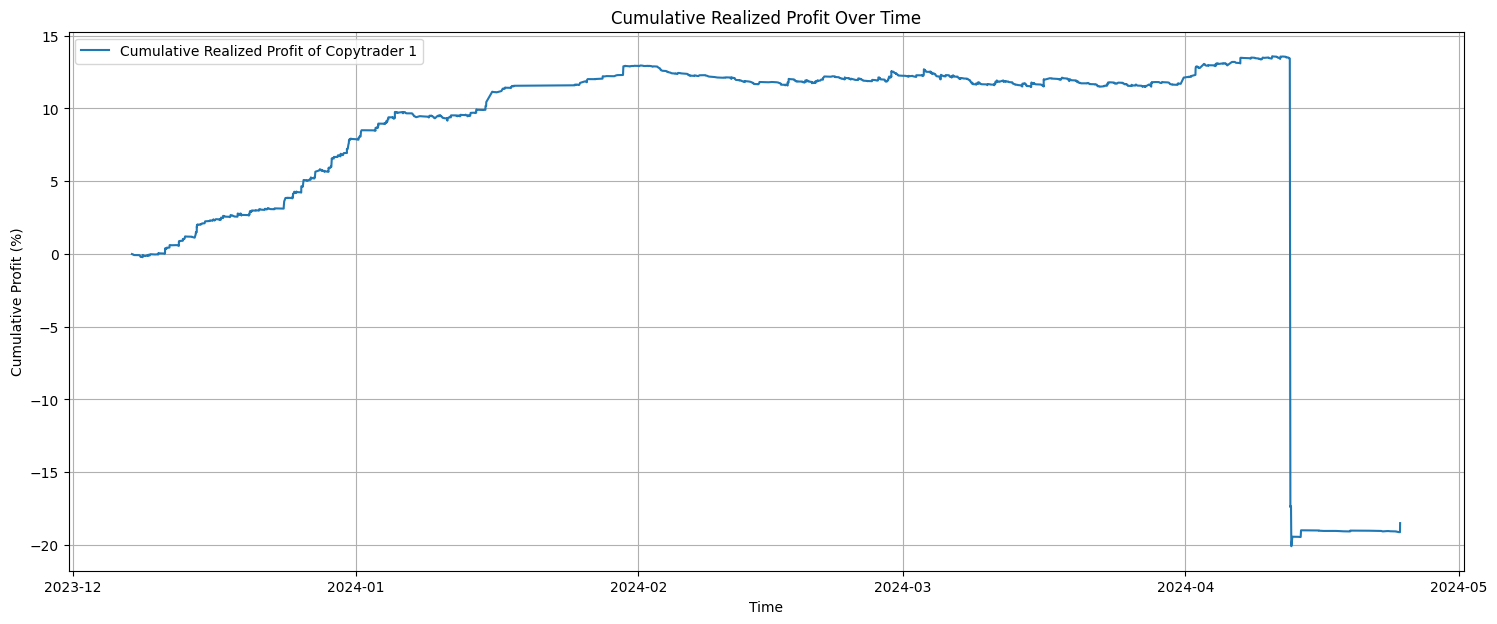

In [18]:
# Plot cumulative realized profit
plt.figure(figsize=(18, 7))
plt.plot(copytrader_1_positions['time'], copytrader_1_positions['cumulative_profit_pct'], label='Cumulative Realized Profit of Copytrader 1')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit (%)')
plt.title('Cumulative Realized Profit Over Time')
plt.legend()
plt.grid(True)
plt.show()

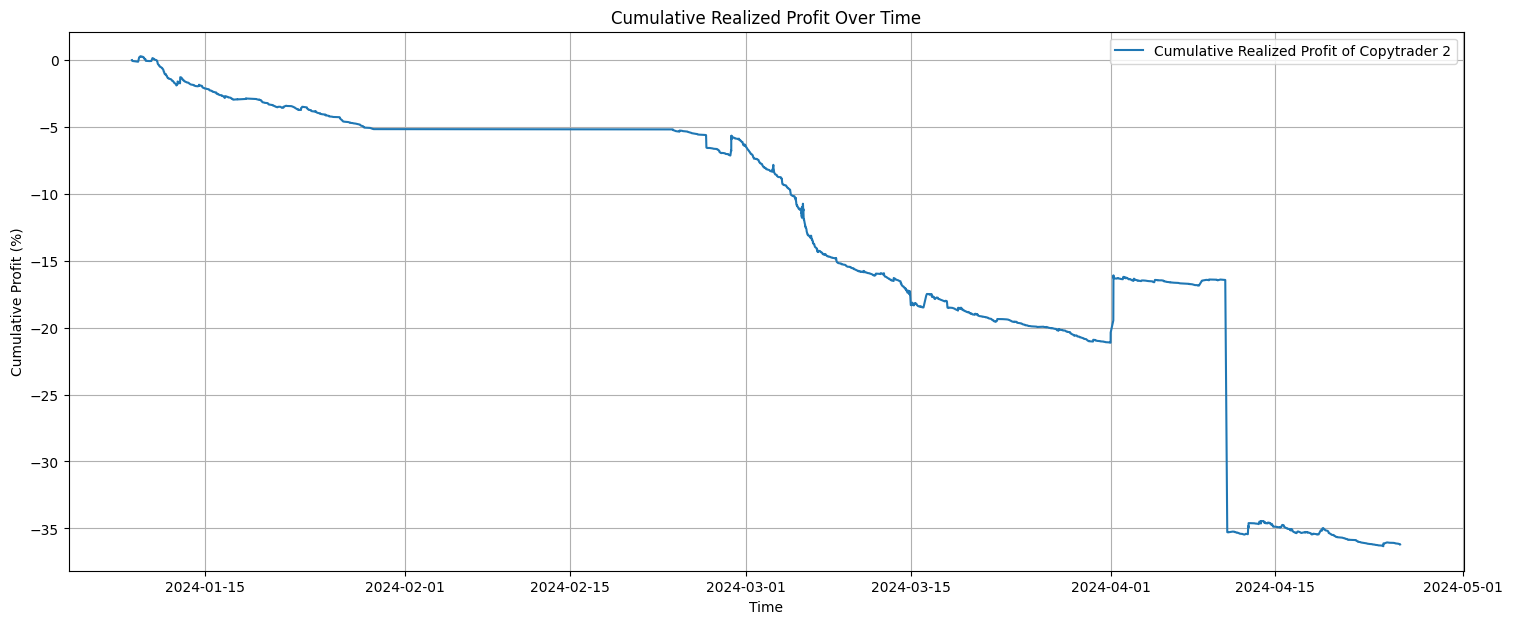

In [19]:
# Plot cumulative realized profit
plt.figure(figsize=(18, 7))
plt.plot(copytrader_2_positions['time'], copytrader_2_positions['cumulative_profit_pct'], label='Cumulative Realized Profit of Copytrader 2')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit (%)')
plt.title('Cumulative Realized Profit Over Time')
plt.legend()
plt.grid(True)
plt.show()

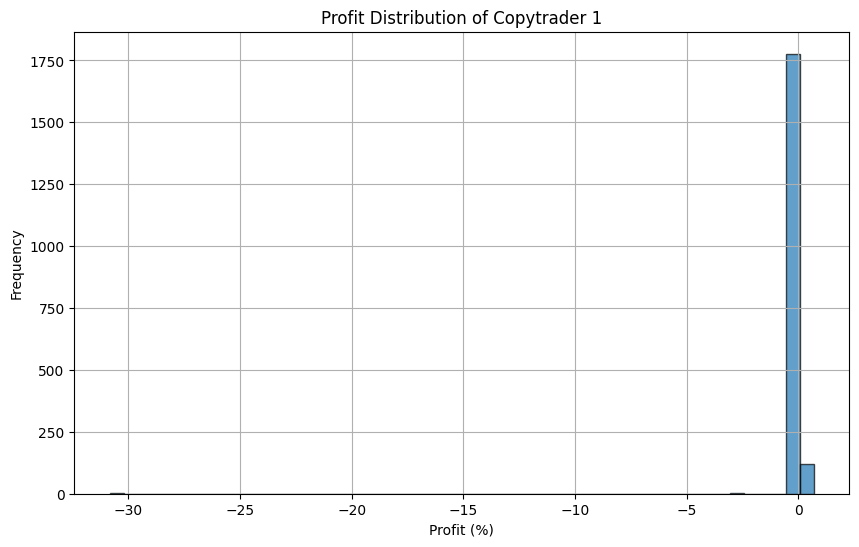

In [20]:
# Plot profit distribution
plt.figure(figsize=(10, 6))
plt.hist(copytrader_1_positions['net_income_pct'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Profit (%)')
plt.ylabel('Frequency')
plt.title('Profit Distribution of Copytrader 1')
plt.grid(True)
plt.show()

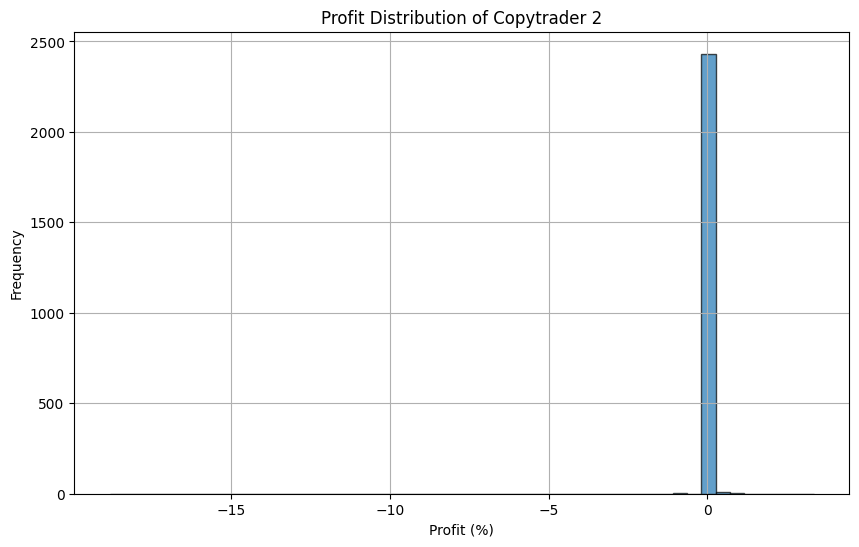

In [21]:
# Plot profit distribution
plt.figure(figsize=(10, 6))
plt.hist(copytrader_2_positions['net_income_pct'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Profit (%)')
plt.ylabel('Frequency')
plt.title('Profit Distribution of Copytrader 2')
plt.grid(True)
plt.show()